In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a Seaborn theme
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3]:
# Filling missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Filling Embarked with mode (most frequent)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin when we there are too many missing values
df.drop(columns=['Cabin'], inplace=True)


<ipython-input-3-b6690f07f1ec>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-3-b6690f07f1ec>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [4]:
# One-hot encode 'Sex' and 'Embarked'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = ['Age', 'Fare']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

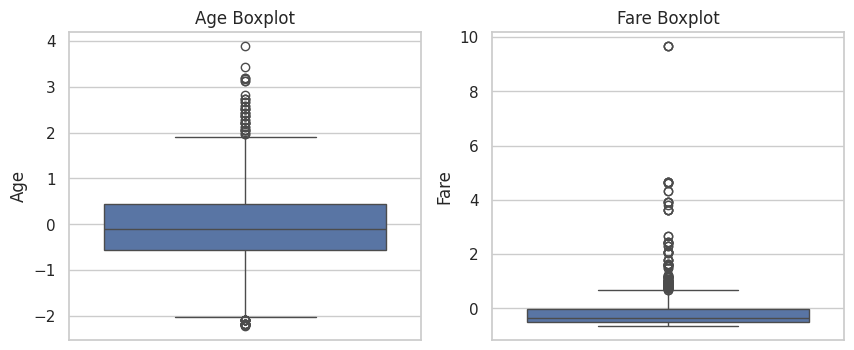

In [6]:
plt.figure(figsize=(10, 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(data=df[col])
    plt.title(f'{col} Boxplot')

from scipy.stats import zscore
df = df[(np.abs(zscore(df[numerical_cols])) < 3).all(axis=1)]

In [7]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  864 non-null    int64  
 1   Survived     864 non-null    int64  
 2   Pclass       864 non-null    int64  
 3   Name         864 non-null    object 
 4   Age          864 non-null    float64
 5   SibSp        864 non-null    int64  
 6   Parch        864 non-null    int64  
 7   Ticket       864 non-null    object 
 8   Fare         864 non-null    float64
 9   Sex_male     864 non-null    bool   
 10  Embarked_Q   864 non-null    bool   
 11  Embarked_S   864 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 70.0+ KB


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.663861,1,0,PC 17599,0.786845,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,True,False,True
